In [213]:
#Import the tools we need
import requests  # sends HTTP requests
import json      # helps us read the data we get back
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install python-dotenv
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the API key
api_key = os.getenv('FRED_API_KEY')




In [215]:

#Pick the data we want — the unemployment rate
series_id = "UNRATE"  # this is the special code for the US unemployment rate


In [217]:
url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json"

In [219]:
 #Send the request to the FRED API
response = requests.get(url)

In [221]:
#Turn the API's response (JSON) into Python data
data = response.json()
print(json.dumps(data, indent=2))

{
  "realtime_start": "2025-05-02",
  "realtime_end": "2025-05-02",
  "observation_start": "1600-01-01",
  "observation_end": "9999-12-31",
  "units": "lin",
  "output_type": 1,
  "file_type": "json",
  "order_by": "observation_date",
  "sort_order": "asc",
  "count": 928,
  "offset": 0,
  "limit": 100000,
  "observations": [
    {
      "realtime_start": "2025-05-02",
      "realtime_end": "2025-05-02",
      "date": "1948-01-01",
      "value": "3.4"
    },
    {
      "realtime_start": "2025-05-02",
      "realtime_end": "2025-05-02",
      "date": "1948-02-01",
      "value": "3.8"
    },
    {
      "realtime_start": "2025-05-02",
      "realtime_end": "2025-05-02",
      "date": "1948-03-01",
      "value": "4.0"
    },
    {
      "realtime_start": "2025-05-02",
      "realtime_end": "2025-05-02",
      "date": "1948-04-01",
      "value": "3.9"
    },
    {
      "realtime_start": "2025-05-02",
      "realtime_end": "2025-05-02",
      "date": "1948-05-01",
      "value": "3.5"

In [117]:
#Look at the most recent data
observations = data["observations"]
latest = observations[-1]  # last item is usually the most recent


#Print it out nicely
print("📊 Latest Unemployment Rate Info:")
print(f"Date: {latest['date']}")
print(f"Unemployment Rate: {latest['value']}%")

📊 Latest Unemployment Rate Info:
Date: 2025-04-01
Unemployment Rate: 4.2%


In [118]:
# ================================
# Data Cleaning & Preprocessing Pipeline
# Description: Prepare FRED unemployment data for analysis
# ================================

# 1️ Extract observations from API response
observations = data['observations']

# 2️ Convert observations to pandas DataFrame
df = pd.DataFrame(observations)

# 3️ Remove rows where 'value' is missing (represented by ".")
df = df[df['value'] != "."]

# 4️ Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# 5 Convert 'value'column to float
df['value'] = df['value'].astype(float)

# 6️ Filter data to include only records from year 2000 onwards
df = df[df['date'].dt.year >= 2000]

# 7️ Create 'year' column for easier grouping and analysis
df['year'] = df['date'].dt.year


# 8️ Quick EDA checks: structure, stats, preview
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 624 to 927
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  304 non-null    object        
 1   realtime_end    304 non-null    object        
 2   date            304 non-null    datetime64[ns]
 3   value           304 non-null    float64       
 4   year            304 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 13.1+ KB


,realtime_start,realtime_end,date,value,year
624,2025-05-02,2025-05-02,2000-01-01,4.0,2000
625,2025-05-02,2025-05-02,2000-02-01,4.1,2000
626,2025-05-02,2025-05-02,2000-03-01,4.0,2000
627,2025-05-02,2025-05-02,2000-04-01,3.8,2000
628,2025-05-02,2025-05-02,2000-05-01,4.0,2000


In [119]:
#checking for missing values
df.isnull().sum()

realtime_start    0
realtime_end      0
date              0
value             0
year              0
dtype: int64

In [120]:
#checking for duplicate values
df.duplicated().sum()

0

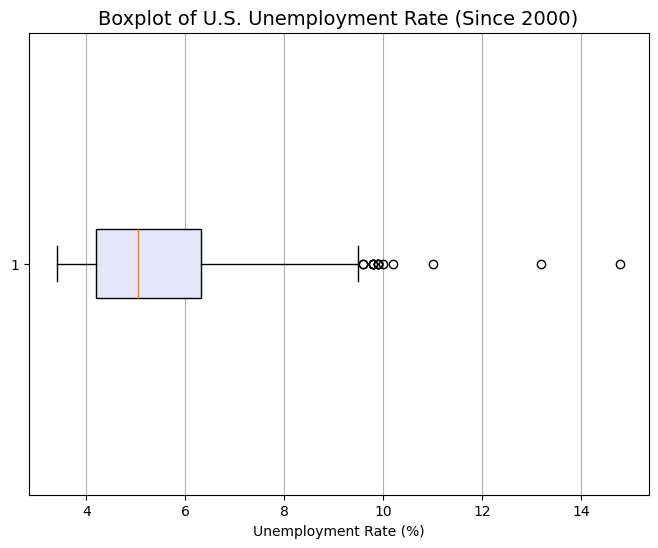

In [121]:
#VISUALIZATIONS
# ================================
# 1. Boxplot of Unemployment Rate
# Purpose: Visualize the distribution, spread, and outliers of U.S. unemployment rate data (since 2000)
# ================================

plt.figure(figsize=(8, 6))
plt.boxplot(df['value'], vert=False, patch_artist=True, boxprops=dict(facecolor='lavender'))
plt.title('Boxplot of U.S. Unemployment Rate (Since 2000)', fontsize=14)
plt.xlabel('Unemployment Rate (%)')
plt.grid(True, axis='x')
plt.show()


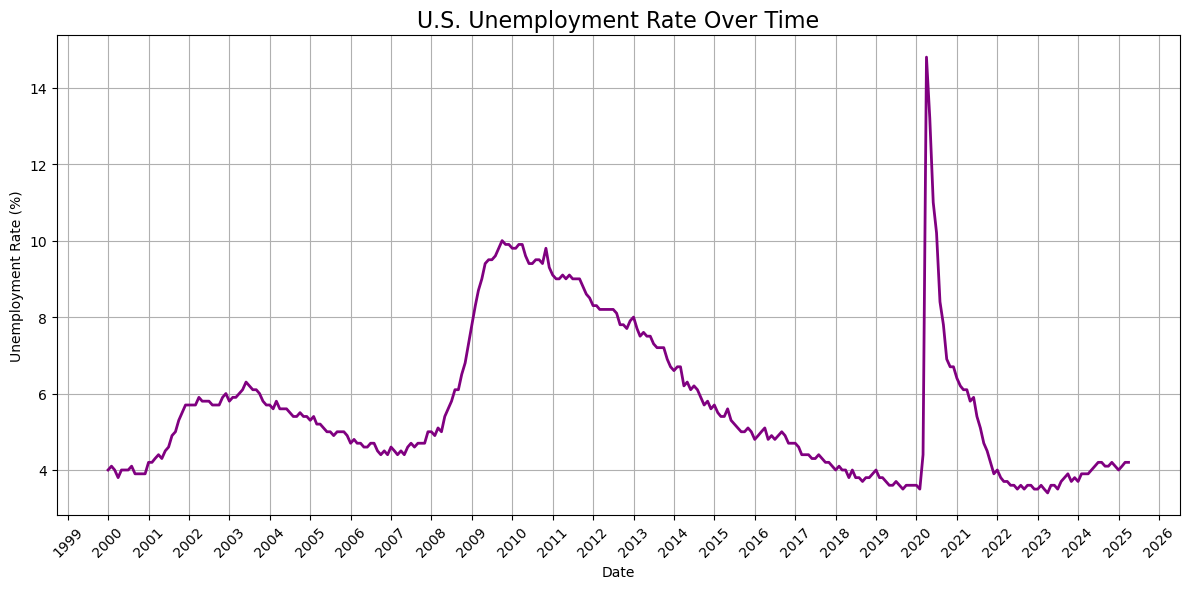

In [122]:
# ============================================
#2. Line Plot of U.S. Unemployment Rate (2000+)
# Purpose: Visualize monthly unemployment rate over time (since 2000)
# ============================================

from datetime import datetime
import matplotlib.dates as mdates

from datetime import datetime

dates = []
values = []
#Extract dates and values from raw API data
for item in data["observations"]:
    date_str = item["date"]
    value_str = item["value"]
    if value_str != ".":
        date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        if date_obj.year >= 2000:  # Filter here directly
            dates.append(date_obj)
            values.append(float(value_str))

#Plot unemployment rate over time
plt.figure(figsize=(12, 6))
plt.plot(dates, values, color="purple", linewidth=2)
plt.title("U.S. Unemployment Rate Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)

#Format X-axis to show every year clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1)) #show every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


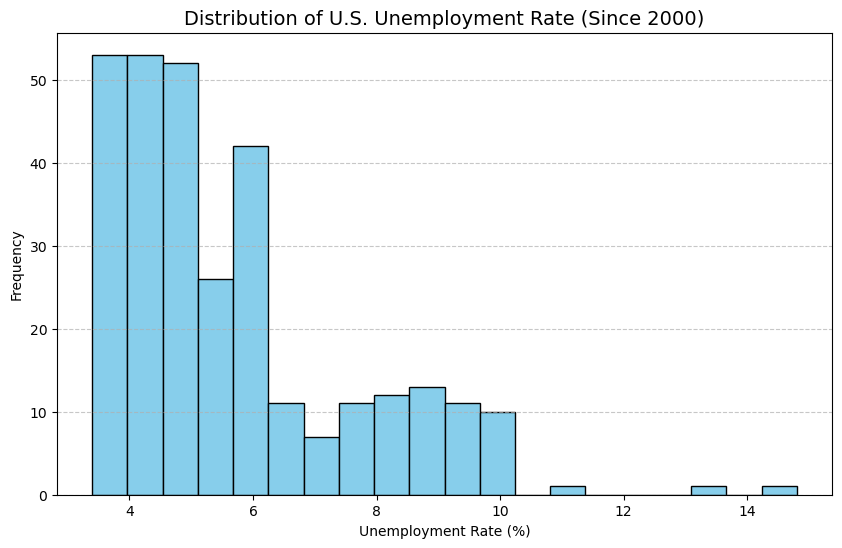

In [123]:
#3. Histogram of U.S. Unemployment Rate (2000+)
# Purpose: Understand the distribution of unemployment rates
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of U.S. Unemployment Rate (Since 2000)', fontsize=14)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')

#Add grid to improve readability (only on Y-axis)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


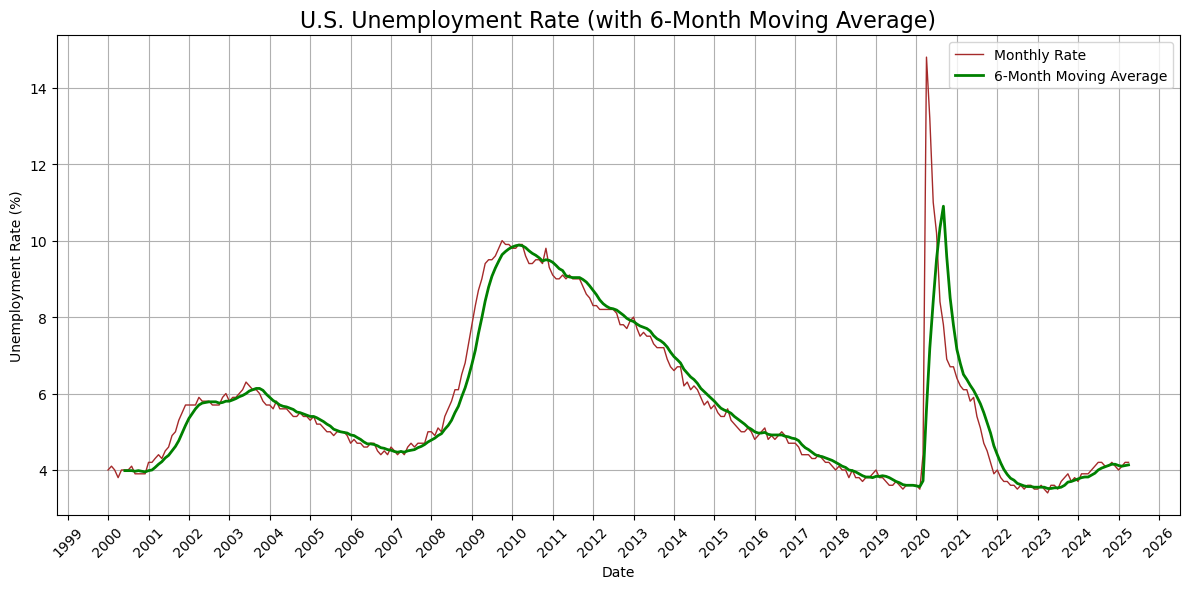

In [203]:
# ================================================================
#4 U.S. Unemployment Rate with 6-Month Moving Average (2000+)
# Purpose: Smooth short-term fluctuations to visualize long-term trend

# Reconstruct 'date' column
df['date'] = pd.date_range(start='2000-01-01', periods=len(df), freq='MS')

# Calculate moving average again (just to be sure)
df['moving_avg'] = df['value'].rolling(window=6).mean()

plt.figure(figsize=(12, 6))

# Plot raw
plt.plot(df['date'], df['value'], color='brown', linewidth=1, label='Monthly Rate')

# Plot moving average
plt.plot(df['date'], df['moving_avg'], color='green', linewidth=2, label='6-Month Moving Average')

plt.title('U.S. Unemployment Rate (with 6-Month Moving Average)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


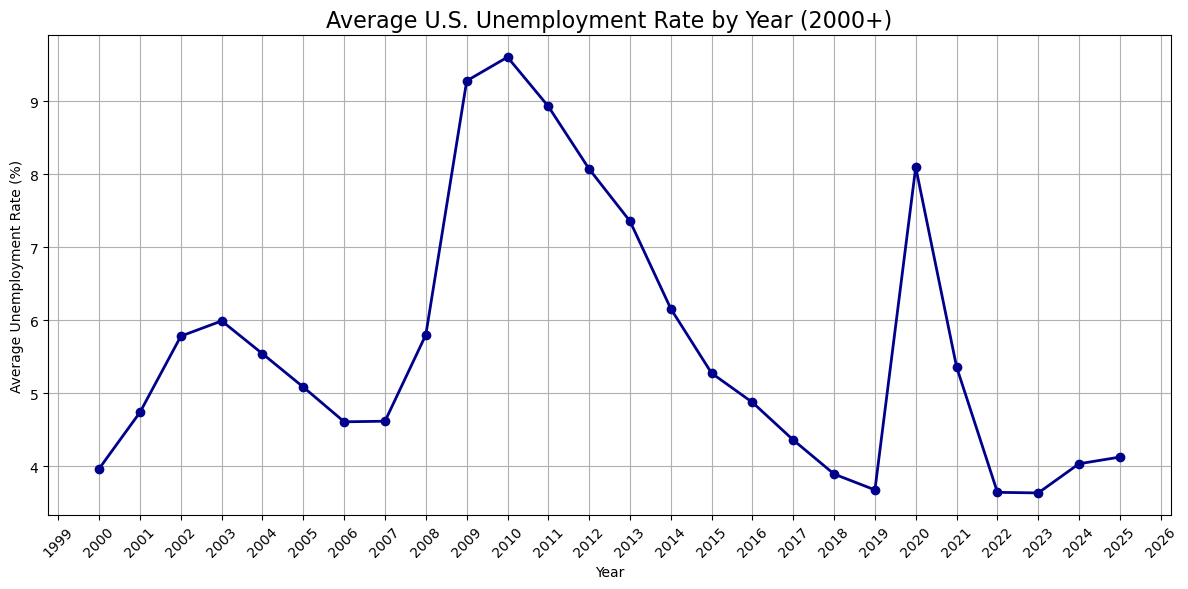

In [207]:
# ================================================================
#5 Average U.S. Unemployment Rate by Year (2000+)
# Purpose: Visualize how the average unemployment rate changes annually


# If missing (since earlier we dropped/rebuilt date), recreate it
if 'date' not in df.columns:
    df['date'] = pd.date_range(start='2000-01-01', periods=len(df), freq='MS')

df['year'] = df['date'].dt.year

# --- Group by year and calculate average unemployment rate ---
yearly_avg = df.groupby('year')['value'].mean()

# --- Convert year index to datetime (Jan 1 of each year, for smooth x-axis formatting) ---
yearly_avg.index = pd.to_datetime(yearly_avg.index, format='%Y')

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='darkblue', linewidth=2)

plt.title('Average U.S. Unemployment Rate by Year (2000+)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)

# 📅 Format x-axis to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


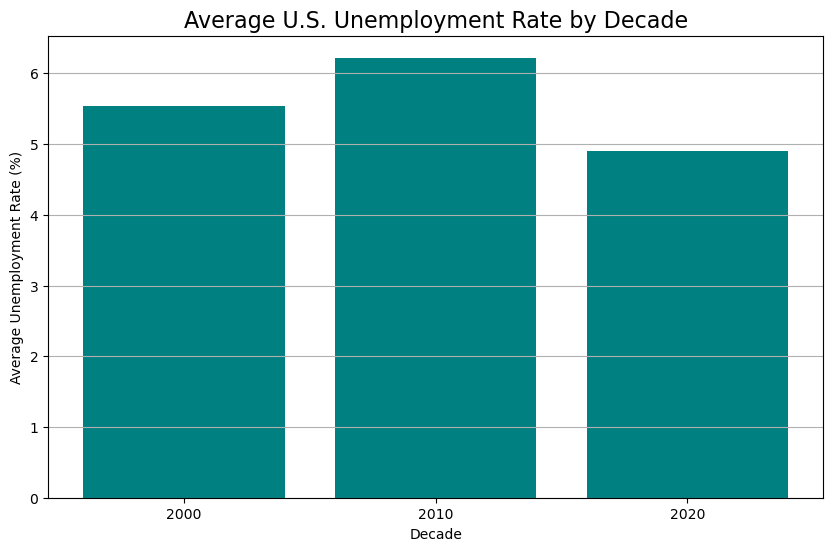

In [138]:
# ================================================================
#6. Average U.S. Unemployment Rate by Decade (2000+)
# Purpose: Visualize how unemployment rate trends over decades
# Create 'decade' column
df['decade'] = (df['year'] // 10) * 10

# Group by decade
decade_avg = df.groupby('decade')['value'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(decade_avg.index.astype(str), decade_avg.values, color='teal')
plt.title('Average U.S. Unemployment Rate by Decade', fontsize=16)
plt.xlabel('Decade')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(axis='y')
plt.show()


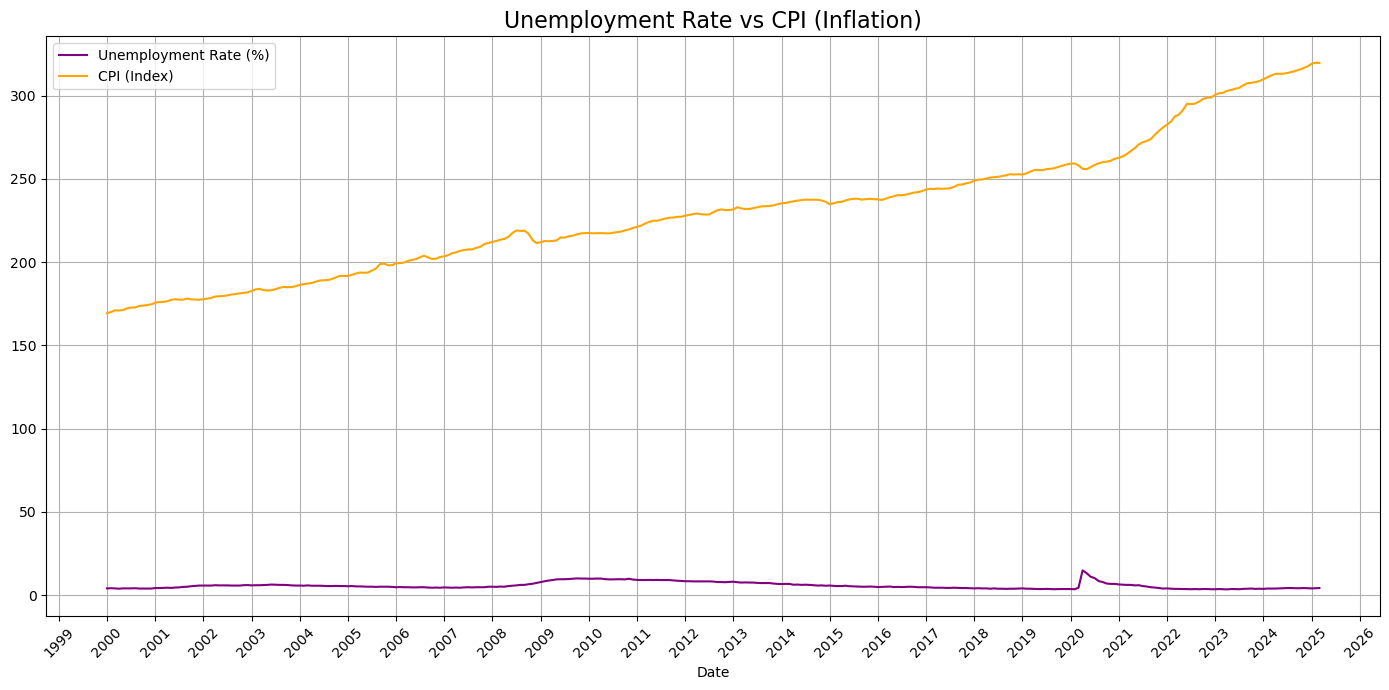

In [140]:
# =============================================================================
# 7.Unemployment Rate vs CPI (Inflation)
# Purpose: Explore if unemployment and inflation move together or opposite (Phillips Curve idea)

#CPI data series ID from FRED
cpi_series_id = "CPIAUCSL"
cpi_url = f"https://api.stlouisfed.org/fred/series/observations?series_id={cpi_series_id}&api_key={api_key}&file_type=json"
response_cpi = requests.get(cpi_url)
cpi_data = response_cpi.json()

# Extract CPI dates + values
cpi_dates = []
cpi_values = []

for item in cpi_data["observations"]:
    date = item["date"]
    value = item["value"]
    if value != ".":
        cpi_dates.append(pd.to_datetime(date))
        cpi_values.append(float(value))

# Create CPI DataFrame
cpi_df = pd.DataFrame({'date': cpi_dates, 'cpi': cpi_values})

# Merge unemployment + CPI on date (inner join)
merged_df = pd.merge(df, cpi_df, on='date', how='inner')

# Plot together
plt.figure(figsize=(14, 7))

plt.plot(merged_df['date'], merged_df['value'], label='Unemployment Rate (%)', color='purple')
plt.plot(merged_df['date'], merged_df['cpi'], label='CPI (Index)', color='orange')

plt.title('Unemployment Rate vs CPI (Inflation)', fontsize=16)
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Format x-axis to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Tick every 1 year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as YYYY
plt.xticks(rotation=45)  # Rotate for readability

plt.tight_layout()
plt.show()


In [141]:
# Calculate the Pearson correlation coefficient between two columns in the DataFrame
correlation = merged_df['value'].corr(merged_df['cpi'])
print(f"Correlation between Unemployment and CPI = {correlation:.2f}")


Correlation between Unemployment and CPI = -0.22


In [142]:
# Ensure CPI DataFrame is sorted by date
cpi_df = cpi_df.sort_values('date')

# Calculate YoY % change (12 months lag)
cpi_df['inflation_rate'] = cpi_df['cpi'].pct_change(periods=12) * 100

# Drop NaN rows (first 12 months won't have result)
cpi_df_clean = cpi_df.dropna(subset=['inflation_rate'])




In [143]:
# Merge on date again (inner join)
merged_df2 = pd.merge(df, cpi_df_clean[['date', 'inflation_rate']], on='date', how='inner')

# Check columns
merged_df2.head()


,realtime_start,realtime_end,date,value,year,moving_avg,decade,inflation_rate
0,2025-05-02,2025-05-02,2000-01-01,4.0,2000,NaN,2000,2.792957
1,2025-05-02,2025-05-02,2000-02-01,4.1,2000,NaN,2000,3.217972
2,2025-05-02,2025-05-02,2000-03-01,4.0,2000,NaN,2000,3.762136
3,2025-05-02,2025-05-02,2000-04-01,3.8,2000,NaN,2000,3.013864
4,2025-05-02,2025-05-02,2000-05-01,4.0,2000,NaN,2000,3.132530


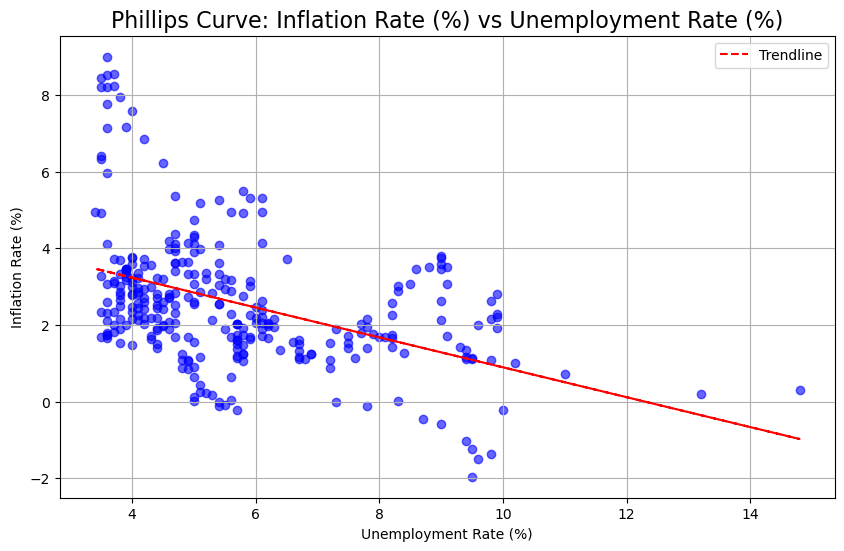

In [144]:

# Generate a scatter plot of Unemployment Rate (value) vs Inflation Rate (inflation_rate)
# Visualize the relationship between Unemployment Rate and Inflation Rate to explore the Phillips Curve.

plt.figure(figsize=(10, 6))
plt.scatter(merged_df2['value'], merged_df2['inflation_rate'], color='blue', alpha=0.6)
plt.title('Phillips Curve: Inflation Rate (%) vs Unemployment Rate (%)', fontsize=16)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)

# Optional: Add trendline
z = np.polyfit(merged_df2['value'], merged_df2['inflation_rate'], 1)
p = np.poly1d(z)
plt.plot(merged_df2['value'], p(merged_df2['value']), "r--", label='Trendline')

plt.legend()
plt.show()


In [145]:
df.head()



,realtime_start,realtime_end,date,value,year,moving_avg,decade
1970-01-01 00:00:00.000000624,2025-05-02,2025-05-02,2000-01-01,4.0,2000,NaN,2000
1970-01-01 00:00:00.000000625,2025-05-02,2025-05-02,2000-02-01,4.1,2000,NaN,2000
1970-01-01 00:00:00.000000626,2025-05-02,2025-05-02,2000-03-01,4.0,2000,NaN,2000
1970-01-01 00:00:00.000000627,2025-05-02,2025-05-02,2000-04-01,3.8,2000,NaN,2000
1970-01-01 00:00:00.000000628,2025-05-02,2025-05-02,2000-05-01,4.0,2000,NaN,2000


In [146]:
# =============================================================================
#clean the data frame(Daata Preprocessing for Modelling)
# Focus only on date + value
#here value = unemployment rate
df_forecast = df[['date', 'value']].copy()

# Convert date column to datetime
df_forecast['date'] = pd.to_datetime(df_forecast['date'])

# Sort + set index to date + ensure monthly frequency
df_forecast = df_forecast.sort_values('date')
df_forecast.set_index('date', inplace=True)
df_forecast = df_forecast.asfreq('MS')  # Monthly start frequency

# Quick check
df_forecast.head()


,value
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [147]:
# If not already installed
!pip install statsmodels

# Imports
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [148]:
# Define and fit SARIMAX model (ARIMA(1,1,1))
model = sm.tsa.SARIMAX(df_forecast['value'], order=(1, 1, 1))
results = model.fit()


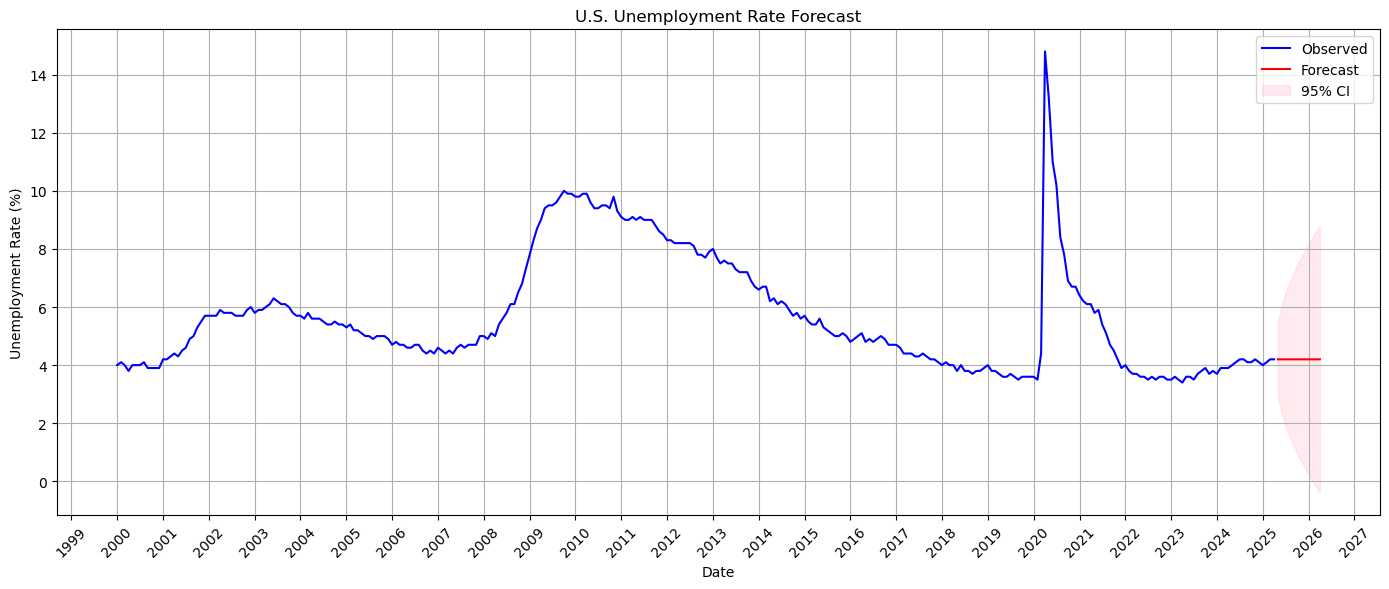

In [149]:
# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=df_forecast.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# Predicted mean + confidence intervals
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(14,6))
plt.plot(df_forecast.index, df_forecast['value'], label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% CI')
plt.title('U.S. Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)

# Format x-axis to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Tick every 1 year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as YYYY
plt.xticks(rotation=45)  # Rotate for readability

plt.tight_layout()
plt.show()



In [150]:
#Blue line → historical unemployment, the Red line → forecast next 12 months and thePink band → 95% confidence interval
